In [ ]:
pip install pyshewhart

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import pyshewhart
import json

In [ ]:
# Ler o arquivo CSV
# https://www.kaggle.com/datasets/rukenmissonnier/manufacturing-data-for-polynomial-regression

df = pd.read_csv('manufacturing.csv')

# Exibir as primeiras linhas
print(df.head())

   Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
0        209.762701        8.050855             1688.769167   
1        243.037873       15.812068             3842.931469   
2        220.552675        7.843130             1729.823314   
3        208.976637       23.786089             4970.736918   
4        184.730960       15.797812             2918.345014   

   Material Fusion Metric  Material Transformation Metric  Quality Rating  
0            44522.217074                    9.229576e+06       99.999971  
1            63020.764997                    1.435537e+07       99.985703  
2            49125.950249                    1.072839e+07       99.999758  
3            57128.881547                    9.125702e+06       99.999975  
4            38068.201283                    6.303792e+06      100.000000  


In [ ]:
# Ver colunas e número de linhas
print(df.shape)

# Ver nomes das colunas
print(df.columns)

# Estatísticas descritivas
print(df.describe())

(3957, 6)
Index(['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure',
       'Material Fusion Metric', 'Material Transformation Metric',
       'Quality Rating'],
      dtype='object')
       Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
count       3957.000000     3957.000000             3957.000000   
mean         200.034704       14.815558             2955.321308   
std           58.135717        5.772040             1458.224940   
min          100.014490        5.003008              513.706875   
25%          150.871296        9.692984             1798.247303   
50%          198.603371       14.832557             2678.277782   
75%          251.366552       19.749680             3929.058261   
max          299.992804       24.999132             7365.018714   

       Material Fusion Metric  Material Transformation Metric  Quality Rating  
count             3957.000000                    3.957000e+03     3957.000000  
mean             48127.183128           

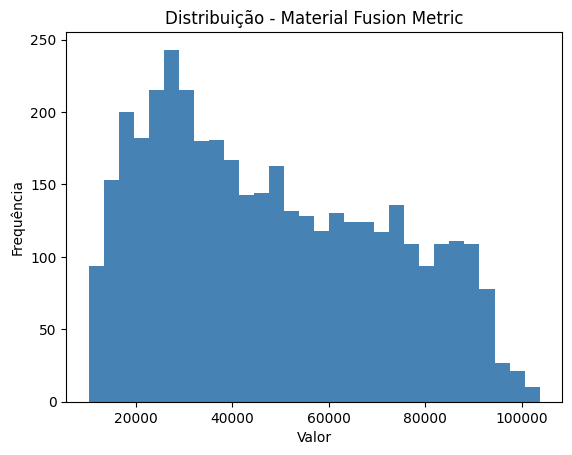

In [ ]:
plt.hist(df['Material Fusion Metric'], bins=30, color='steelblue')
plt.title('Distribuição - Material Fusion Metric')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

In [ ]:
# Abrir e carregar o arquivo JSON
with open('manufacturing-data-for-polynomial-regression-metadata.json', 'r', encoding='utf-8') as file:
    dados = json.load(file)

# Exibir o conteúdo (ou parte dele)
print(dados.keys())         # Mostra as chaves principais do dicionário
print(dados['description']) # Exemplo de acesso a um campo específico

FileNotFoundError: [Errno 2] No such file or directory: 'manufacturing-data-for-polynomial-regression-metadata.json'

In [ ]:
dados = df['Material Transformation Metric']

In [ ]:
# Ver colunas e número de linhas
print(dados.shape)

# Estatísticas descritivas
print(dados.describe())

(3957,)
count    3.957000e+03
mean     1.003645e+07
std      7.599356e+06
min      9.999462e+05
25%      3.433810e+06
50%      7.833390e+06
75%      1.588251e+07
max      2.699783e+07
Name: Material Transformation Metric, dtype: float64


In [ ]:
# Média amostral
media_amostral = dados.mean()

print(f'Média amostral: {media_amostral:.2f}')


# Calcular a amplitude amostral
amplitude = dados.max() - dados.min()

print(f'Amplitude amostral: {amplitude:.2f}')

Média amostral: 10036453.55
Amplitude amostral: 25997879.91


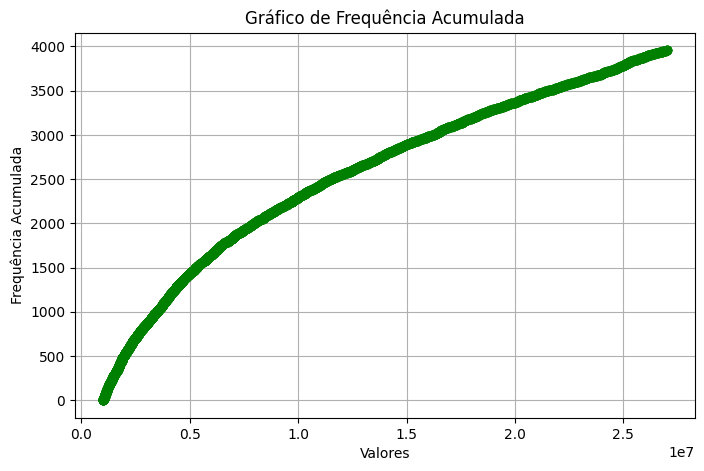

In [ ]:
# Criar uma tabela de frequências absolutas
tabela_frequencia = dados.value_counts().sort_index()

# Calcular a frequência acumulada
frequencia_acumulada = tabela_frequencia.cumsum()

# Criar o gráfico de frequência acumulada
plt.figure(figsize=(8, 5))
plt.plot(frequencia_acumulada.index, frequencia_acumulada.values,
         marker='o', color='green', linestyle='-')

plt.title('Gráfico de Frequência Acumulada')
plt.xlabel('Valores')
plt.ylabel('Frequência Acumulada')
plt.grid(True)
plt.show()

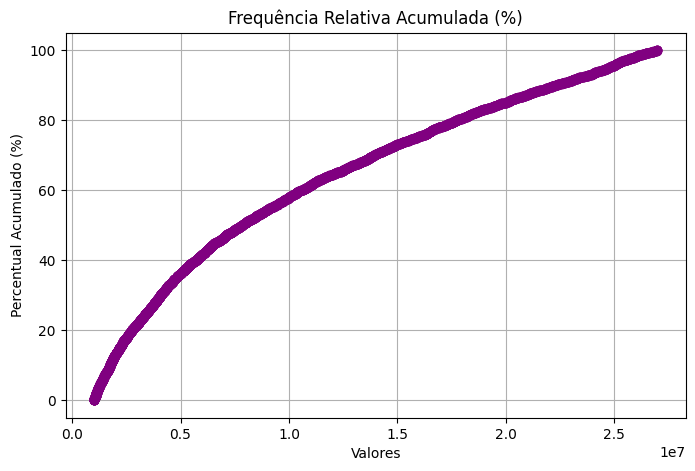

In [ ]:
frequencia_relativa = tabela_frequencia / tabela_frequencia.sum()
frequencia_relativa_acumulada = frequencia_relativa.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(frequencia_relativa_acumulada.index,
         frequencia_relativa_acumulada.values * 100,
         marker='o', color='purple')

plt.title('Frequência Relativa Acumulada (%)')
plt.xlabel('Valores')
plt.ylabel('Percentual Acumulado (%)')
plt.grid(True)
plt.show()

Is the process in control?
No
Enter to close plots and exit.yes


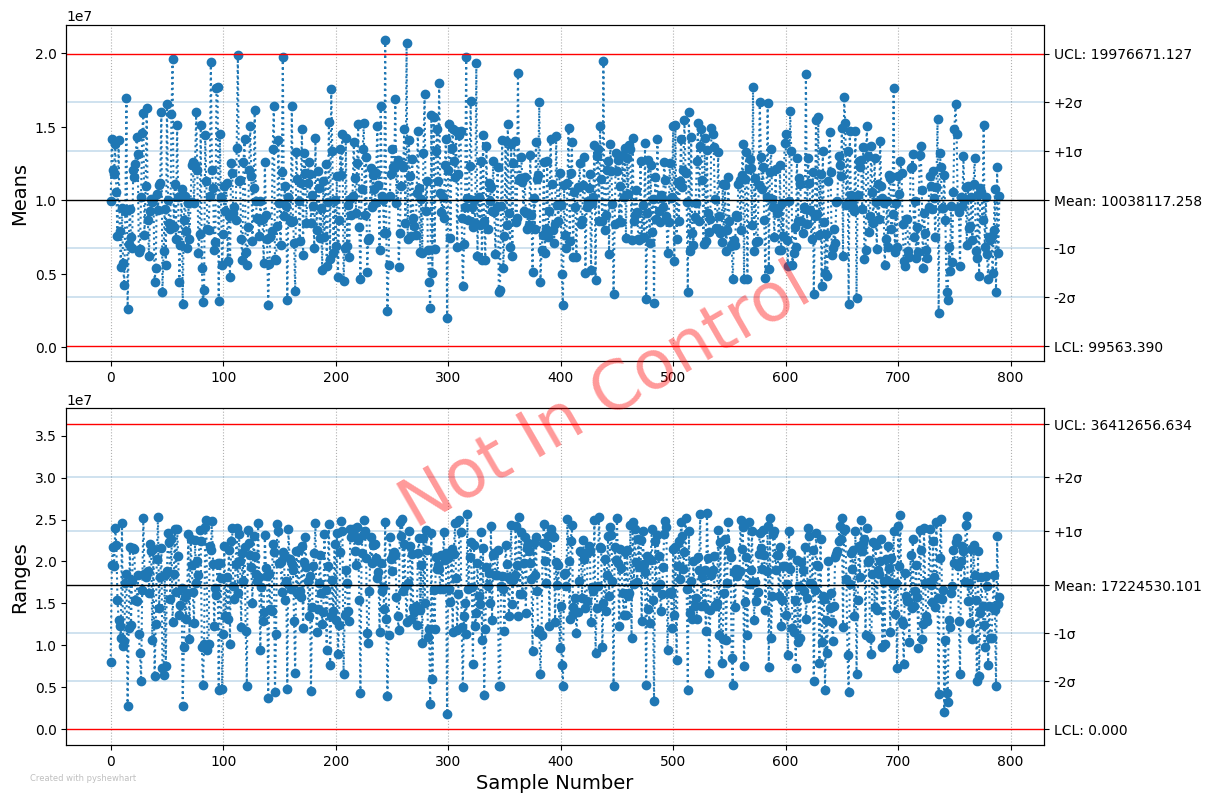

In [ ]:
def main():

    cc = pyshewhart.XbarRControlChart(
        dados,
        sample_size=5,
        units="",
        suptitle="",
        title="",
    )

    print("Is the process in control?")
    print("Yes" if cc.in_control else "No")
    input("Enter to close plots and exit.")


if __name__ == "__main__":
    main()